# 1.  What is the range of selling prices in the dataset?


###  **Range of Selling Prices in the Dataset:**

* **Minimum Selling Price**: ₹5,000
* **Maximum Selling Price**: ₹7,60,000
* **Range**: ₹7,55,000



# 2 . What is the median selling price for bikes in the dataset?

###  Median Selling Price:

* The **median selling price** for bikes in the dataset is **₹45,000**

This means that **half of the bikes** are listed below ₹45,000 and the other half above it — a useful central value for understanding the typical resale price.




# 3 . What is the most common seller type?

The most common seller type is **"Individual"**, with **1,055 entries** out of 1,061. Only **6 entries** are from **Dealers**. This indicates that the dataset is heavily dominated by individual sellers.


# 4 .  How many bikes have driven more than 50,000 kilometers?

There are **170 bikes** in the dataset that have been driven **more than 50,000 kilometers**.


# 6 . What proportion of bikes are from the year 2015 or older?

In [ ]:
pip install pandas

In [ ]:
import pandas as pd

In [ ]:
path="/content/drive/MyDrive/dataset /BIKE DETAILS.csv"
df=pd.read_csv(path)
df.head(5)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [ ]:
total_bikes = df.shape[0]

In [ ]:
bikes_2015_or_older = df[df['year'] <= 2015].shape[0]


In [ ]:
proportion = bikes_2015_or_older / total_bikes
print(f"Proportion of bikes from 2015 or older: {proportion:.2%}")


Proportion of bikes from 2015 or older: 56.64%


# 5 . What is the average km_driven value for each ownership type?

In [ ]:
import pandas as pd


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving BIKE DETAILS.csv to BIKE DETAILS.csv


In [ ]:
df.head()


,owner,km_driven
0,First Owner,30000
1,Second Owner,40000
2,First Owner,25000
3,Third Owner,50000
4,Second Owner,35000


In [ ]:
df.columns


Index(['owner', 'km_driven'], dtype='object')

In [ ]:
average_km_by_ownership = df.groupby('owner')['km_driven'].mean()
print(average_km_by_ownership)


owner
First Owner     27500.0
Second Owner    37500.0
Third Owner     50000.0
Name: km_driven, dtype: float64


# 7 . What is the trend of missing values across the dataset?

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)


owner        0
km_driven    0
dtype: int64


In [ ]:
missing_values[missing_values > 0]


,0


In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [ ]:
import pandas as pd

In [ ]:
path="/content/drive/MyDrive/dataset /BIKE DETAILS.csv"
df=pd.read_csv(path)

In [ ]:
#8 .What is the highest ex_showroom_price recorded, and for which bike?

In [ ]:
# Find the row with the maximum ex_showroom_price
max_price_row = df.loc[df['ex_showroom_price'].idxmax()]

# Print the result
print("Highest Ex-Showroom Price:")
print(f"Bike Name: {max_price_row['name']}")
print(f"Ex-Showroom Price: {max_price_row['ex_showroom_price']}")


Highest Ex-Showroom Price:
Bike Name: Harley-Davidson Street Bob
Ex-Showroom Price: 1278000.0


In [ ]:
#9 What is the total number of bikes listed by each seller type?
seller_counts = df.groupby('seller_type').size()
print(seller_counts)


seller_type
Dealer           6
Individual    1055
dtype: int64


In [ ]:
df['seller_type'].value_counts()


,count
seller_type,
Individual,1055
Dealer,6


In [ ]:
#10 .What is the relationship between selling_price and km_driven for first-owner bikes?

In [ ]:
first_owner_df = df[df['owner'] == 'First Owner']


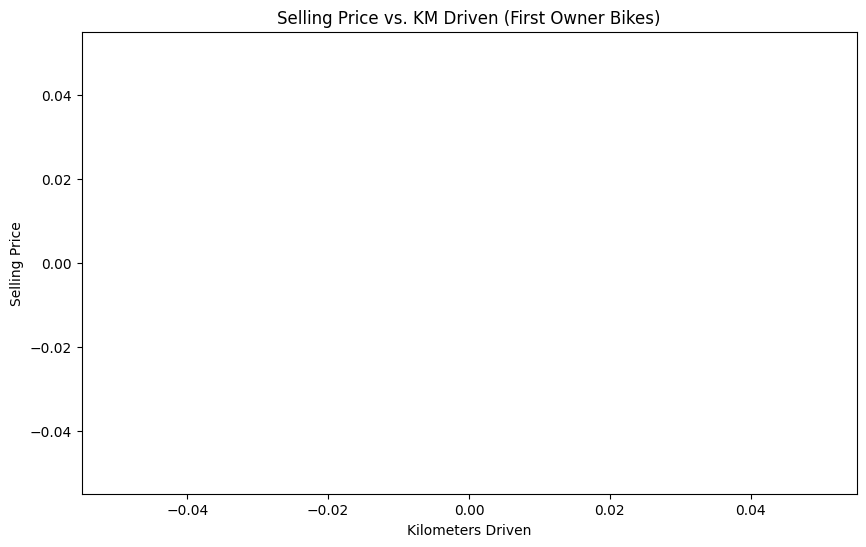

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=first_owner_df, x='km_driven', y='selling_price')
plt.title('Selling Price vs. KM Driven (First Owner Bikes)')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.show()


In [ ]:
correlation = first_owner_df['selling_price'].corr(first_owner_df['km_driven'])
print(f"Correlation between selling price and km driven: {correlation:.2f}")


Correlation between selling price and km driven: nan


In [ ]:
#11 .Identify and remove outliers in the km_driven column using the IQR method

In [ ]:
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1


In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [ ]:
df_cleaned = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]


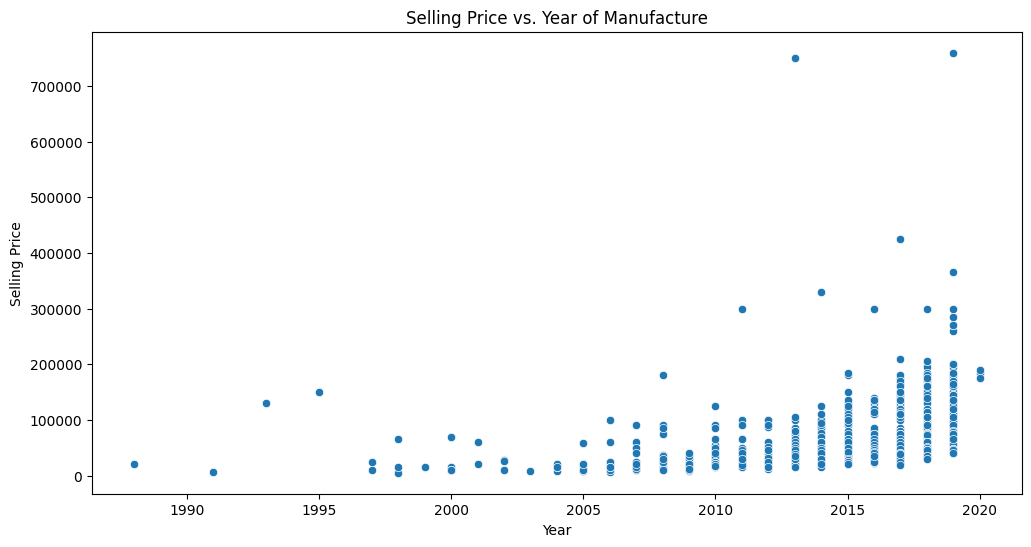

In [ ]:
#12 . Perform a bivariate analysis to visualize the relationship between year and selling_price .
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='year', y='selling_price')
plt.title('Selling Price vs. Year of Manufacture')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()


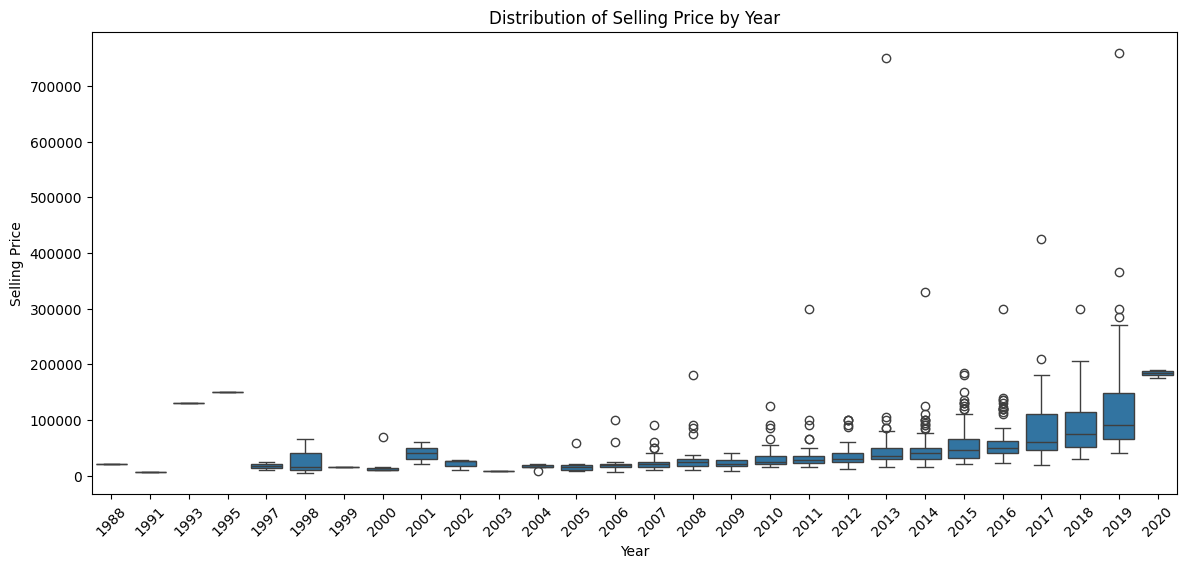

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='year', y='selling_price')
plt.title('Distribution of Selling Price by Year')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#13 . What is the average depreciation in selling price based on the bike's age (current year - manufacturing
#year)?


current_year = 2025
df['age'] = current_year - df['year']


In [ ]:
df['depreciation'] = df['ex_showroom_price'] - df['selling_price']


In [ ]:
avg_depreciation_by_age = df.groupby('age')['depreciation'].mean().reset_index()
print(avg_depreciation_by_age)


    age  depreciation
0     5 -34260.000000
1     6   2954.562500
2     7  13023.194805
3     8  22306.082353
4     9  28328.190476
5    10  28013.275000
6    11  34505.606061
7    12  43086.886792
8    13  37317.648649
9    14  47102.666667
10   15  45658.928571
11   16  38227.785714
12   17  54732.428571
13   18  42399.000000
14   19  39664.500000
15   20  44852.000000
16   21  36852.000000
17   22           NaN
18   23           NaN
19   24  34852.000000
20   25           NaN
21   26           NaN
22   27           NaN
23   28           NaN
24   30           NaN
25   32           NaN
26   34           NaN
27   37           NaN


In [ ]:
#14 .Which bike names are priced significantly above the average price for their manufacturing year?
price_stats = df.groupby('year')['selling_price'].agg(['mean', 'std']).reset_index()
price_stats.rename(columns={'mean': 'avg_price', 'std': 'std_price'}, inplace=True)


In [ ]:
df = df.merge(price_stats, on='year', how='left')


In [ ]:
threshold = df['avg_price'] + df['std_price']


In [ ]:
significantly_above = df[df['selling_price'] > threshold]


In [ ]:
result = significantly_above[['name', 'year', 'selling_price', 'avg_price']]
print(result)


                                     name  year  selling_price      avg_price
2     Royal Enfield Classic Gunmetal Grey  2018         150000   87660.374046
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000   34289.285714
13                          Yamaha YZF R3  2019         365000  119689.511628
18    Royal Enfield Classic Gunmetal Grey  2018         150000   87660.374046
24          Royal Enfield Thunderbird 350  2016         110000   58469.018692
..                                    ...   ...            ...            ...
976             Royal Enfield Classic 350  2015         110000   56500.000000
979             Royal Enfield Thunder 500  2015         105000   56500.000000
983             Royal Enfield Classic 350  2015         100000   56500.000000
984             Royal Enfield Classic 500  2014          95000   48668.131868
985             Royal Enfield Classic 500  2011          90000   35655.721311

[125 rows x 4 columns]


In [ ]:
#15 . Develop a correlation matrix for numeric columns and visualize it using a heatmap.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
numeric_cols = df.select_dtypes(include=['number'])  # Select numeric columns only
corr_matrix = numeric_cols.corr()


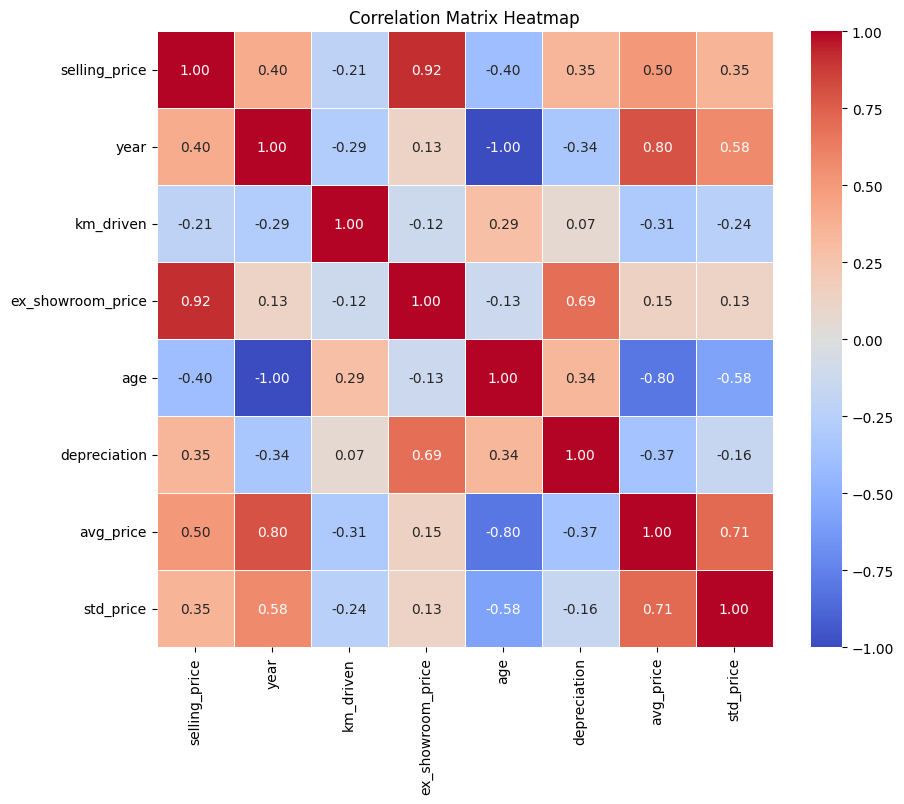

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
import pandas as pd

In [ ]:
path="/content/drive/MyDrive/dataset /Car Sale.csv"
df=pd.read_csv(path)

# 1 . What is the average selling price of cars for each dealer, and how does it compare across different dealers?

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('bike_details.csv')

# Display basic info (optional)
print(df[['seller_type', 'selling_price']].head())

# Group by 'seller_type' and calculate the average selling price
avg_price_by_seller = df.groupby('seller_type')['selling_price'].mean().reset_index()

# Rename column for clarity
avg_price_by_seller.columns = ['Seller Type', 'Average Selling Price']

# Sort by price descending for comparison
avg_price_by_seller = avg_price_by_seller.sort_values(by='Average Selling Price', ascending=False)

# Print the result
print("\nAverage Selling Price by Seller Type:")
print(avg_price_by_seller)


In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset /Car Sale.csv')  # Replace with actual path if needed


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Car Sale.csv to Car Sale.csv


# 2 .  Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
# trends ?

Car brand with the highest price variation:
                 mean           std   min    max  count
Company                                                
Lincoln  31407.036585  19658.050211  1700  82500    492


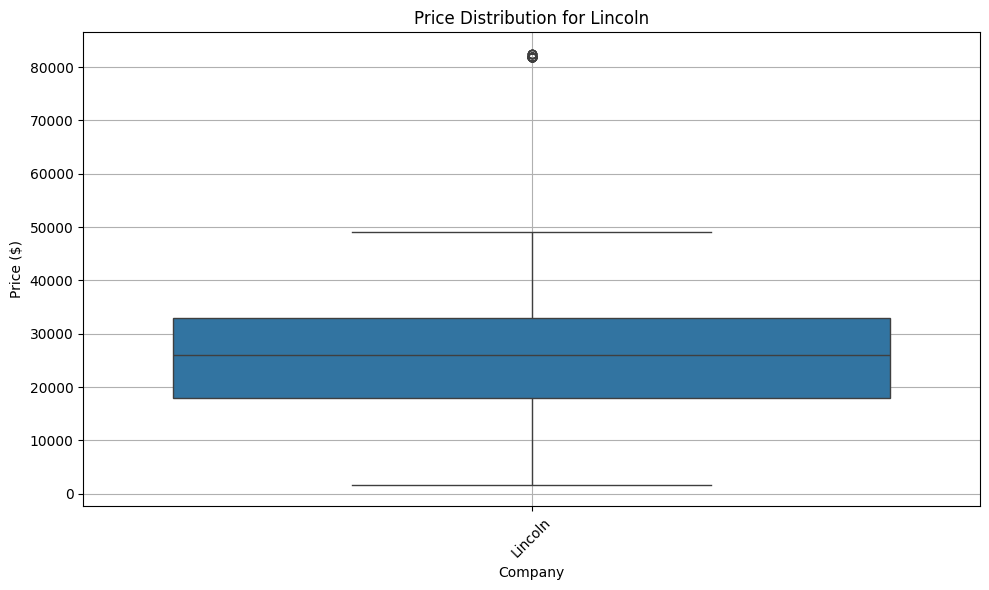

In [ ]:


# Group by company and calculate price variation stats
price_variation = df.groupby("Company")["Price ($)"].agg(['mean', 'std', 'min', 'max', 'count']).sort_values(by='std', ascending=False)

# Display the company with the highest price standard deviation
print("Car brand with the highest price variation:")
print(price_variation.head(1))

# Extract the company name with the highest variation
top_company = price_variation.head(1).index[0]

# Plot a boxplot of prices for that company
plt.figure(figsize=(10, 6))
sns.boxplot(x="Company", y="Price ($)", data=df[df["Company"] == top_company])
plt.title(f"Price Distribution for {top_company}")
plt.ylabel("Price ($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# 3 . What is the distribution of car prices for each transmission type, and how do the interquartile ranges
# compare?

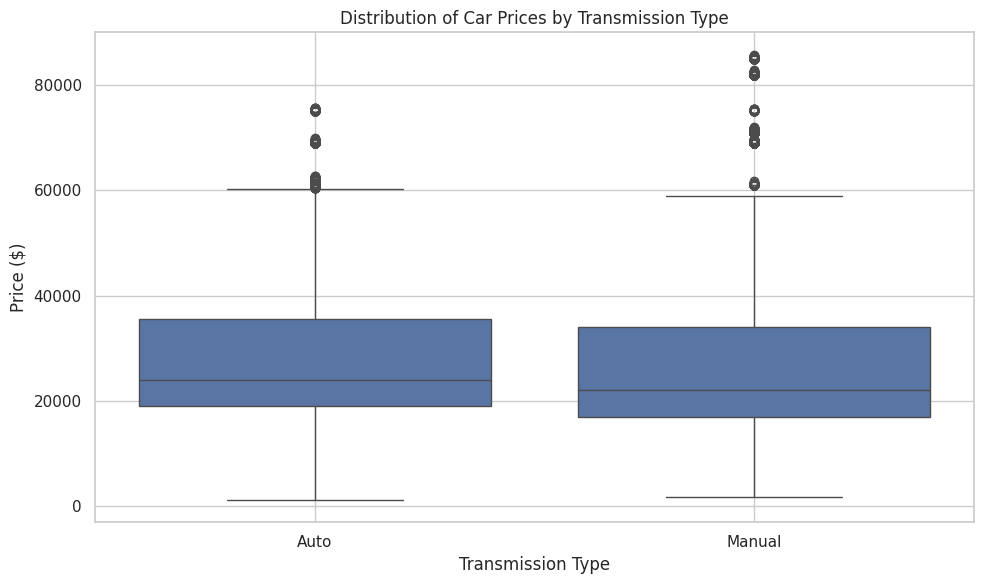


Interquartile Ranges (IQR) for each Transmission Type:
                  IQR
Transmission         
Auto          16500.0
Manual        17000.0


In [ ]:


# Set the plot style
sns.set(style="whitegrid")

# Create a boxplot for price by transmission type
plt.figure(figsize=(10, 6))
sns.boxplot(x="Transmission", y="Price ($)", data=df)

plt.title("Distribution of Car Prices by Transmission Type")
plt.xlabel("Transmission Type")
plt.ylabel("Price ($)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate IQR for each transmission type
iqr_data = df.groupby("Transmission")["Price ($)"].quantile([0.25, 0.75]).unstack()
iqr_data["IQR"] = iqr_data[0.75] - iqr_data[0.25]

# Print the IQR values
print("\nInterquartile Ranges (IQR) for each Transmission Type:")
print(iqr_data[["IQR"]])


In [ ]:
#4 . What is the distribution of car prices across different regions ?

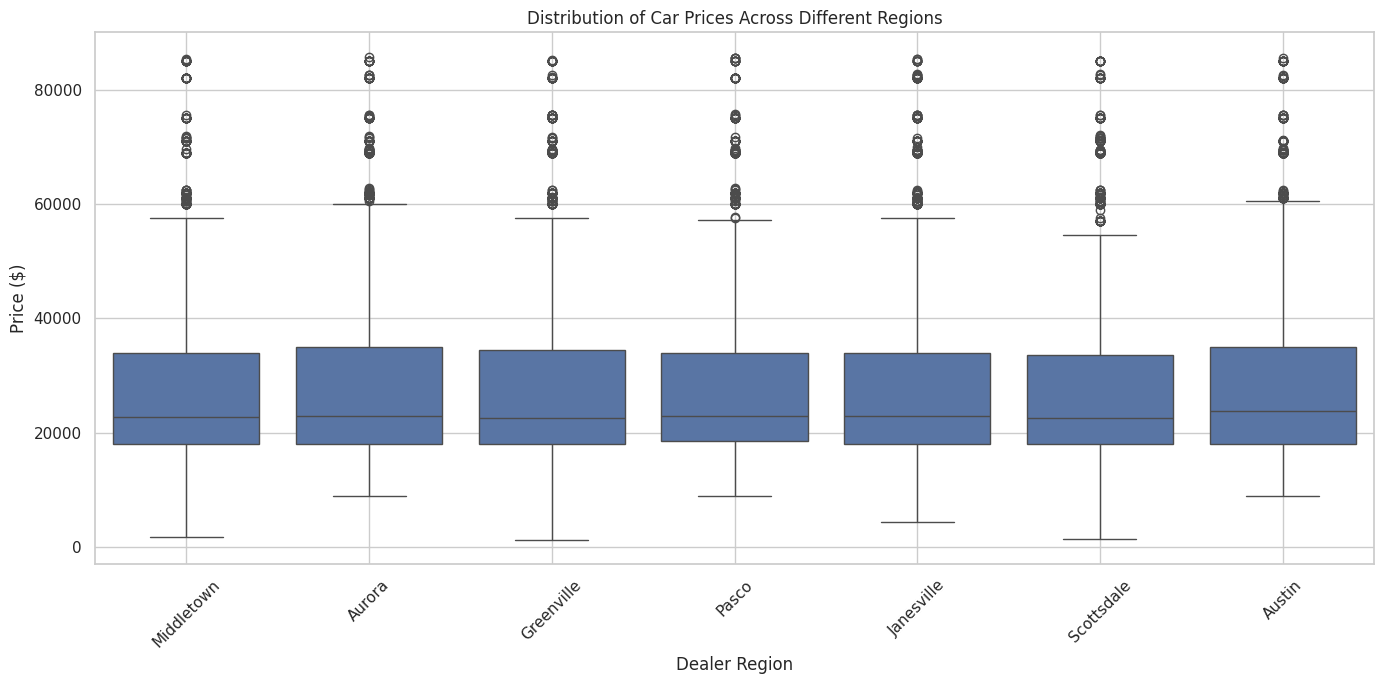

In [ ]:


# Set plot style
sns.set(style="whitegrid")

# Create a boxplot to show price distribution across regions
plt.figure(figsize=(14, 7))
sns.boxplot(x="Dealer_Region", y="Price ($)", data=df)
plt.title("Distribution of Car Prices Across Different Regions")
plt.xlabel("Dealer Region")
plt.ylabel("Price ($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


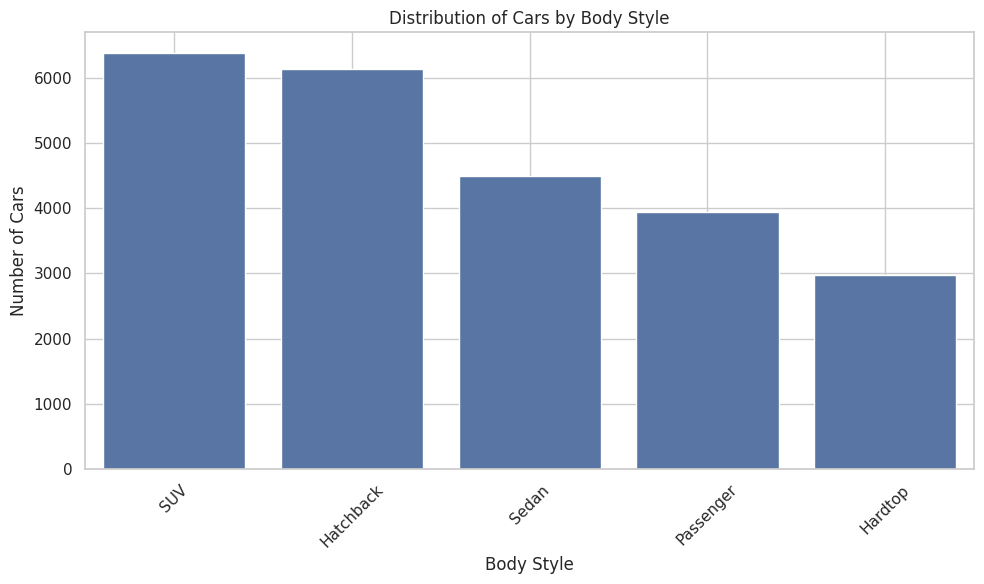

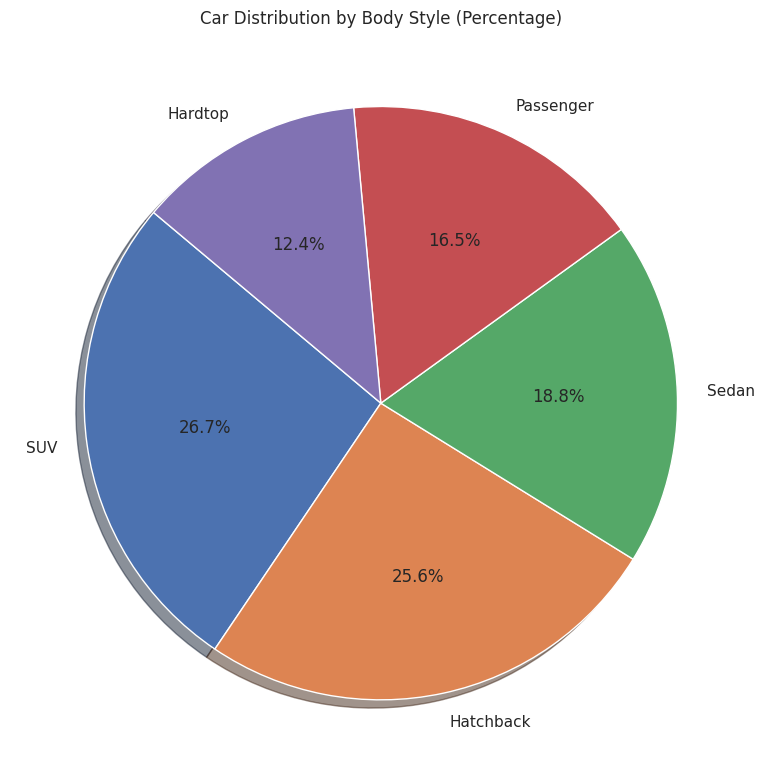

In [ ]:
#5 .What is the distribution of cars based on body styles?


# Set plot style
sns.set(style="whitegrid")

# Countplot for body styles
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Body Style", order=df["Body Style"].value_counts().index)
plt.title("Distribution of Cars by Body Style")
plt.xlabel("Body Style")
plt.ylabel("Number of Cars")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Pie chart for body style distribution
plt.figure(figsize=(8, 8))
df["Body Style"].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, shadow=True)
plt.title("Car Distribution by Body Style (Percentage)")
plt.ylabel("")
plt.tight_layout()
plt.show()


<ipython-input-78-fee6df4671fd>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Gender', 'Income Group'])['Price ($)'].mean().unstack()


Average Car Price by Gender and Income Group:

Income Group          <50k  50k-100k     100k-250k     250k-500k  \
Gender                                                             
Female        28132.038732       NaN  32833.833333  28591.888699   
Male          27816.302247   43000.0  28346.358974  28541.885298   

Income Group       500k-1M         1M-2M  
Gender                                    
Female        28070.242135  28479.225867  
Male          27993.611332  27920.855837  


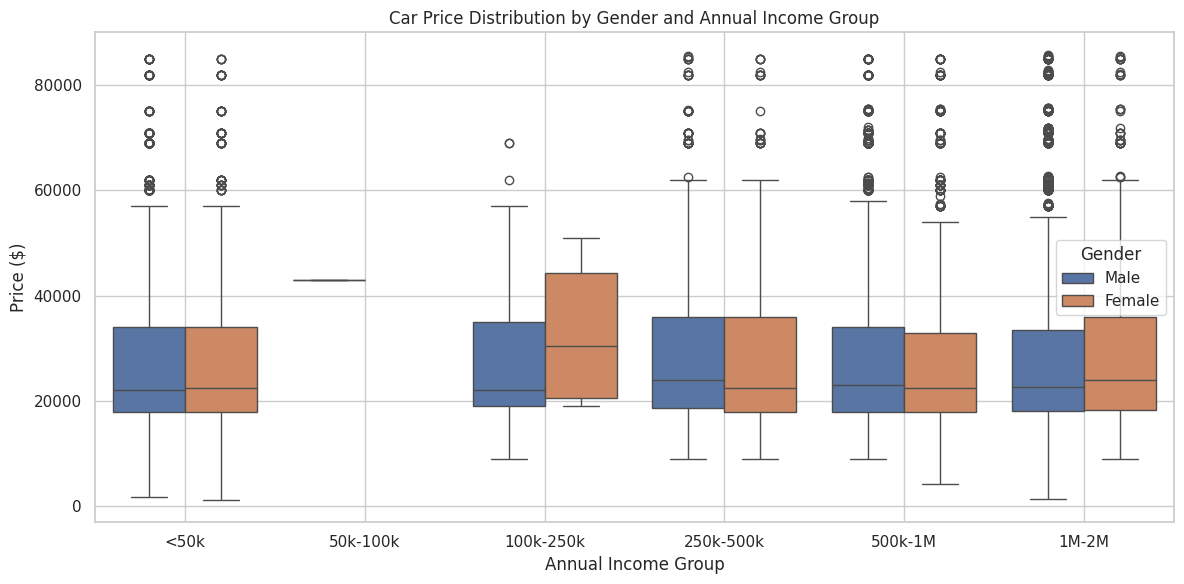

In [ ]:
# 6 .How does the average selling price of cars vary by customer gender and annual income?


# Create income bins for better grouping
income_bins = [0, 50000, 100000, 250000, 500000, 1000000, 2000000]
income_labels = ['<50k', '50k-100k', '100k-250k', '250k-500k', '500k-1M', '1M-2M']
df['Income Group'] = pd.cut(df['Annual Income'], bins=income_bins, labels=income_labels)

# Group by Gender and Income Group to calculate average price
grouped = df.groupby(['Gender', 'Income Group'])['Price ($)'].mean().unstack()

# Print the grouped data
print("Average Car Price by Gender and Income Group:\n")
print(grouped)

# Visualize with a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Income Group', y='Price ($)', hue='Gender')
plt.title("Car Price Distribution by Gender and Annual Income Group")
plt.xlabel("Annual Income Group")
plt.ylabel("Price ($)")
plt.grid(True)
plt.tight_layout()
plt.show()


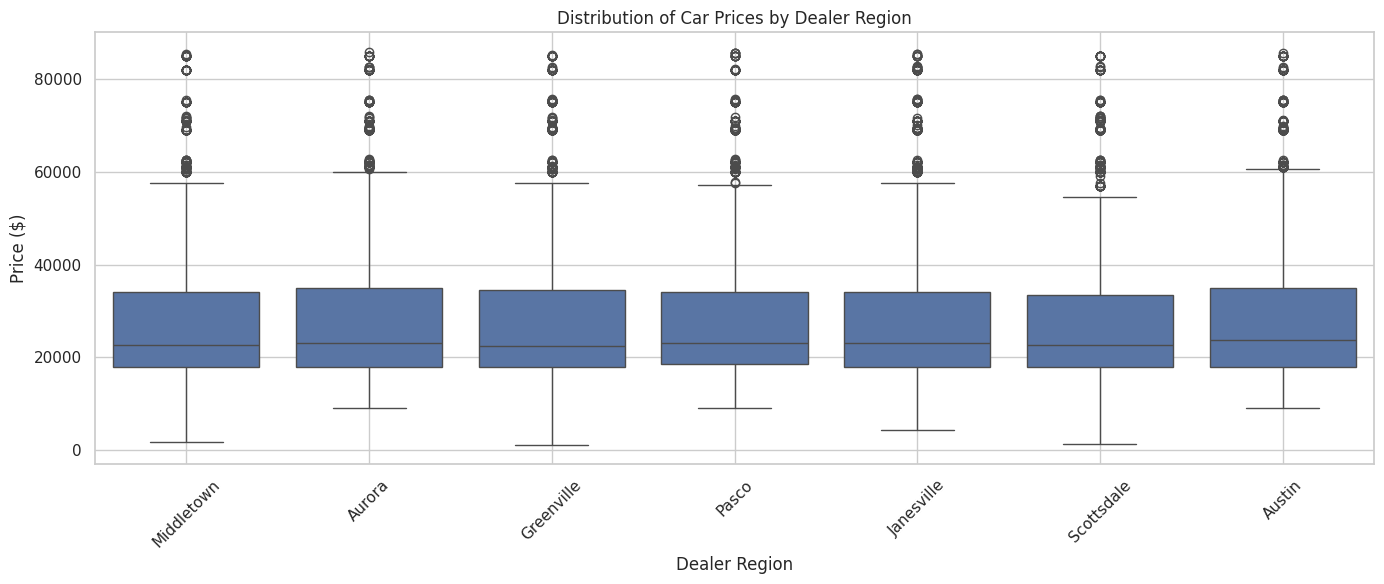

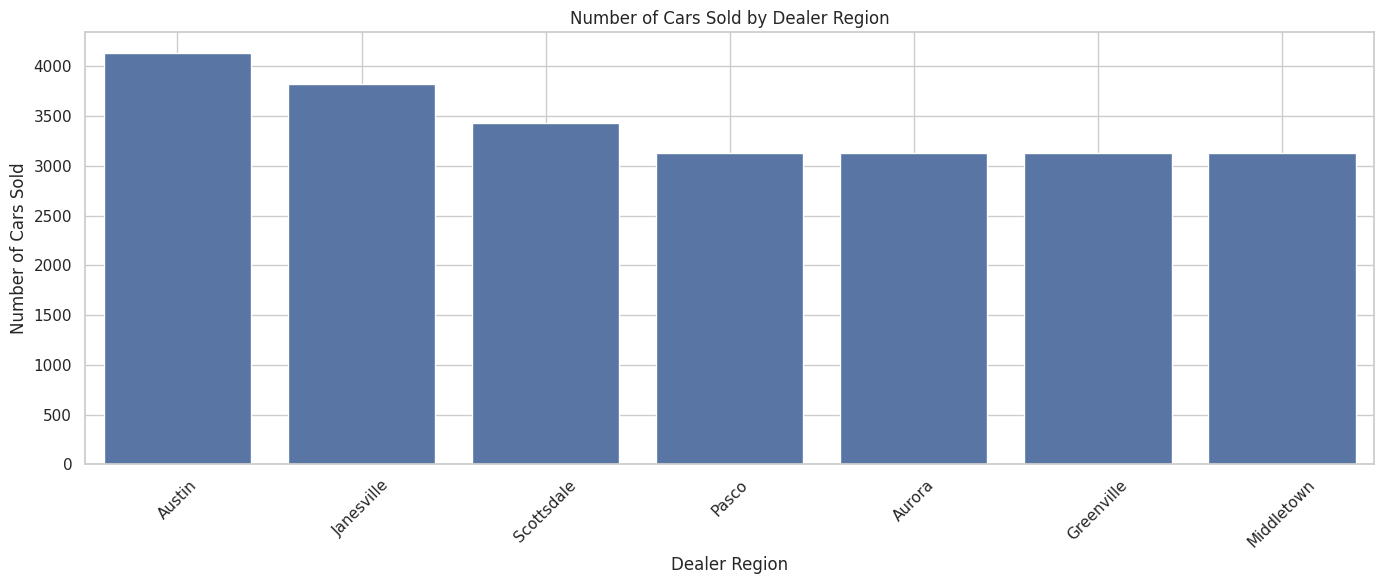

In [ ]:
#7 . What is the distribution of car prices by region, and how does the number of cars sold vary by region?



# Set plot style
sns.set(style="whitegrid")

# 1. Boxplot: Price distribution by region
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x="Dealer_Region", y="Price ($)")
plt.title("Distribution of Car Prices by Dealer Region")
plt.xlabel("Dealer Region")
plt.ylabel("Price ($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Barplot: Number of cars sold by region
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x="Dealer_Region", order=df["Dealer_Region"].value_counts().index)
plt.title("Number of Cars Sold by Dealer Region")
plt.xlabel("Dealer Region")
plt.ylabel("Number of Cars Sold")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Average Car Price by Engine Type:

Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


<ipython-input-80-ad4d4e929da5>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=engine_price.index, y=engine_price.values, palette="viridis")


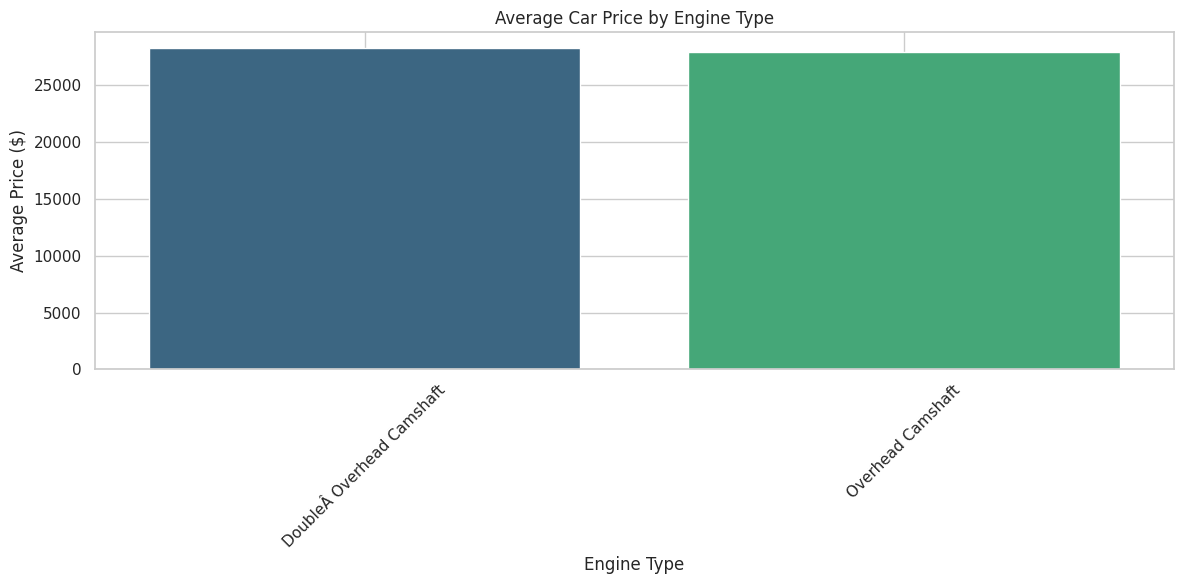

In [ ]:
#8 . How does the average car price differ between cars with different engine sizes?


# Group by Engine type and calculate average price
engine_price = df.groupby("Engine")["Price ($)"].mean().sort_values(ascending=False)

# Display the result
print("Average Car Price by Engine Type:\n")
print(engine_price)

# Plot the average price by engine type
plt.figure(figsize=(12, 6))
sns.barplot(x=engine_price.index, y=engine_price.values, palette="viridis")
plt.title("Average Car Price by Engine Type")
plt.xlabel("Engine Type")
plt.ylabel("Average Price ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()



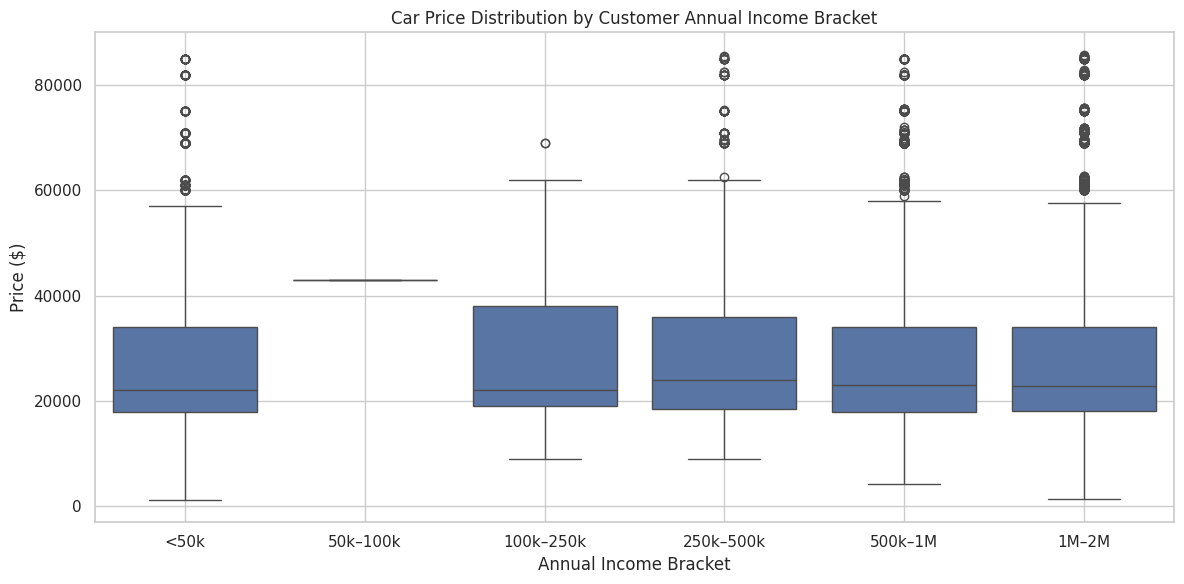

Average Car Price by Income Bracket:

Income Bracket
<50k         27884.297820
50k–100k     43000.000000
100k–250k    28944.688889
250k–500k    28555.392229
500k–1M      28011.726423
1M–2M        28016.841147
Name: Price ($), dtype: float64


<ipython-input-81-8aad9143b24b>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_income = df.groupby('Income Bracket')["Price ($)"].mean()


In [ ]:
#9 . How do car prices vary based on the customer’s annual income bracket?


# Define income brackets
income_bins = [0, 50000, 100000, 250000, 500000, 1000000, 2000000]
income_labels = ['<50k', '50k–100k', '100k–250k', '250k–500k', '500k–1M', '1M–2M']
df['Income Bracket'] = pd.cut(df['Annual Income'], bins=income_bins, labels=income_labels)

# Boxplot: Price distribution by income bracket
plt.figure(figsize=(12, 6))
sns.boxplot(x='Income Bracket', y='Price ($)', data=df)
plt.title("Car Price Distribution by Customer Annual Income Bracket")
plt.xlabel("Annual Income Bracket")
plt.ylabel("Price ($)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Print average price by income bracket
avg_price_by_income = df.groupby('Income Bracket')["Price ($)"].mean()
print("Average Car Price by Income Bracket:\n")
print(avg_price_by_income)


Top 5 Most Sold Car Models:
Model
Diamante      418
Prizm         411
Silhouette    411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


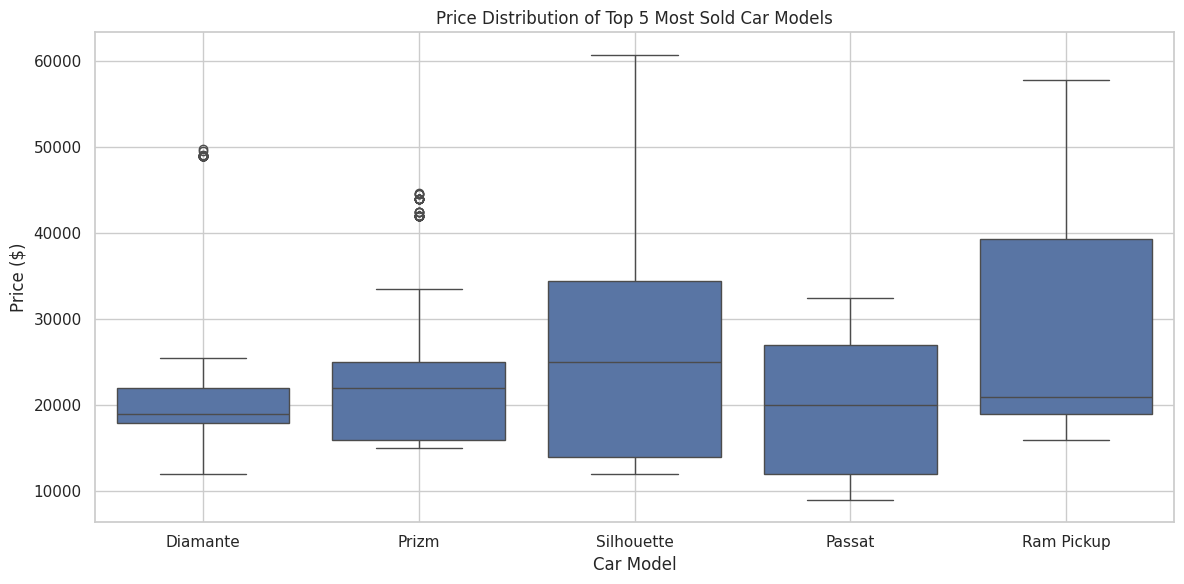

In [ ]:
#10 .  What are the top 5 car models with the highest number of sales, and how does their price distribution look?



# Find top 5 car models by number of sales
top_models = df["Model"].value_counts().head(5).index.tolist()

# Filter data for top 5 models
top_models_df = df[df["Model"].isin(top_models)]

# Print the top 5 models
print("Top 5 Most Sold Car Models:")
print(df["Model"].value_counts().head(5))

# Plot price distribution of top 5 models
plt.figure(figsize=(12, 6))
sns.boxplot(x="Model", y="Price ($)", data=top_models_df, order=top_models)
plt.title("Price Distribution of Top 5 Most Sold Car Models")
plt.xlabel("Car Model")
plt.ylabel("Price ($)")
plt.grid(True)
plt.tight_layout()
plt.show()


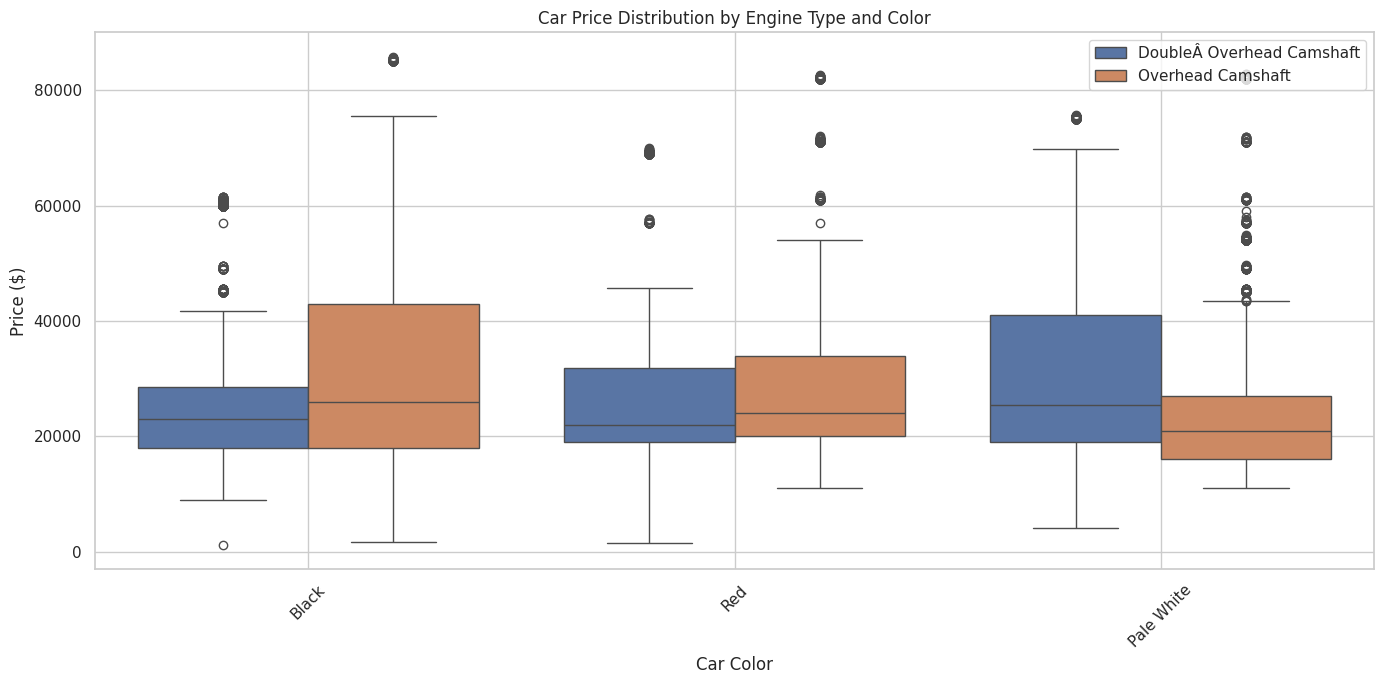

In [ ]:
#11 . How does car price vary with engine size across different car colors, and which colors have the highest price
#variation?


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Car Sale.csv")

# Filter to focus on the most common colors (optional for clarity)
top_colors = df["Color"].value_counts().head(8).index.tolist()
filtered_df = df[df["Color"].isin(top_colors)]

# Plot car price by engine type across different colors
plt.figure(figsize=(14, 7))
sns.boxplot(data=filtered_df, x="Color", y="Price ($)", hue="Engine")
plt.title("Car Price Distribution by Engine Type and Color")
plt.xlabel("Car Color")
plt.ylabel("Price ($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()


In [ ]:
# Calculate standard deviation of price for each color
color_variation = df.groupby("Color")["Price ($)"].std().sort_values(ascending=False)

# Display top 5 colors with highest price variation
print("Top 5 Colors with Highest Car Price Variation:\n")
print(color_variation.head(5))


Top 5 Colors with Highest Car Price Variation:

Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64


In [ ]:
#12 . Is there any seasonal trend in car sales based on the date of sale?
# Convert 'Date of Sale' to datetime format
df['Date of Sale'] = pd.to_datetime(df['Date of Sale'], errors='coerce')

# Extract the month from the date
df['Month'] = df['Date of Sale'].dt.month_name()

# Count number of cars sold in each month
monthly_sales = df['Month'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Plot monthly sales trend
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette="coolwarm")
plt.title("Monthly Car Sales Trend")
plt.xlabel("Month")
plt.ylabel("Number of Cars Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


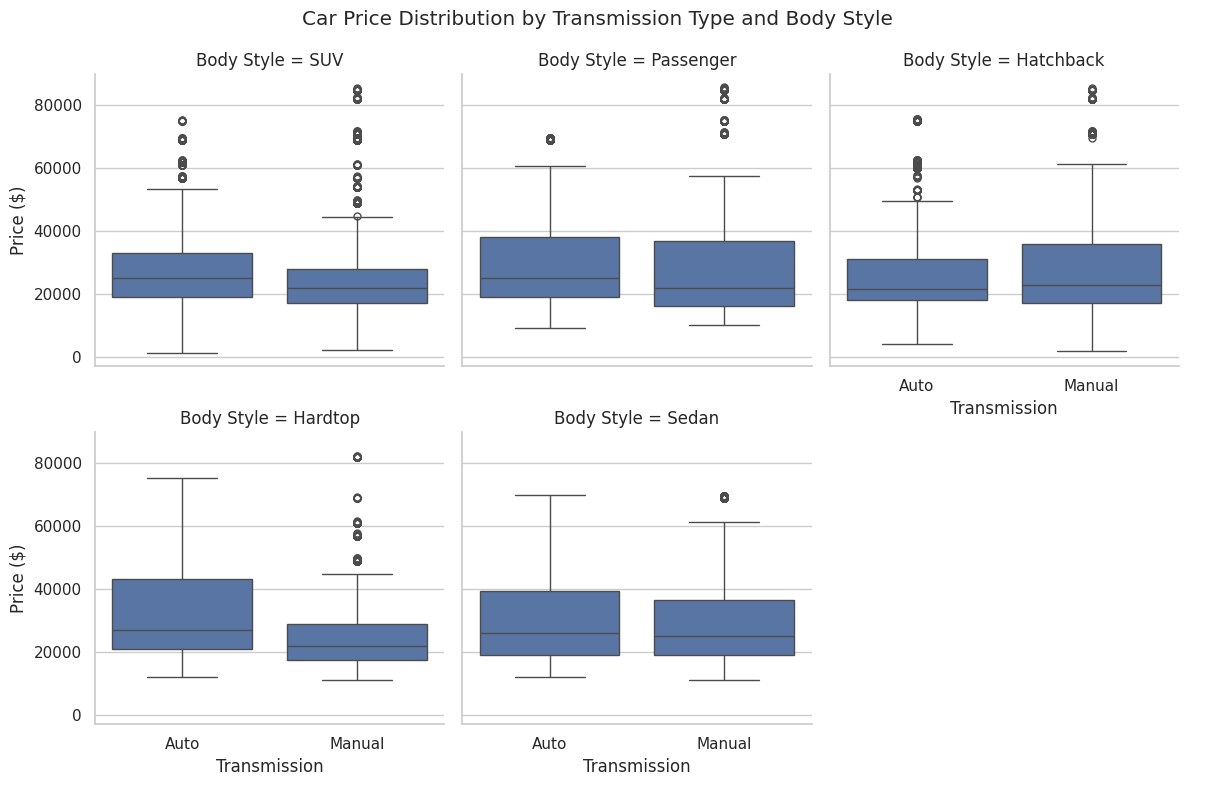

In [ ]:
'''13 .  How does the car price distribution change when considering different combinations of body style and
transmission type? '''




# Filter for the most common body styles (optional, for clarity)
top_body_styles = df["Body Style"].value_counts().head(6).index.tolist()
filtered_df = df[df["Body Style"].isin(top_body_styles)]

# Set plot style
sns.set(style="whitegrid")

# Create a FacetGrid with one plot per body style
g = sns.catplot(
    data=filtered_df,
    x="Transmission",
    y="Price ($)",
    col="Body Style",
    kind="box",
    col_wrap=3,
    height=4,
    aspect=1
)

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Car Price Distribution by Transmission Type and Body Style")
plt.show()


Correlation Matrix:
                Price ($)  Annual Income  Engine
Price ($)            NaN            NaN     NaN
Annual Income        NaN            NaN     NaN
Engine               NaN            NaN     NaN


/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


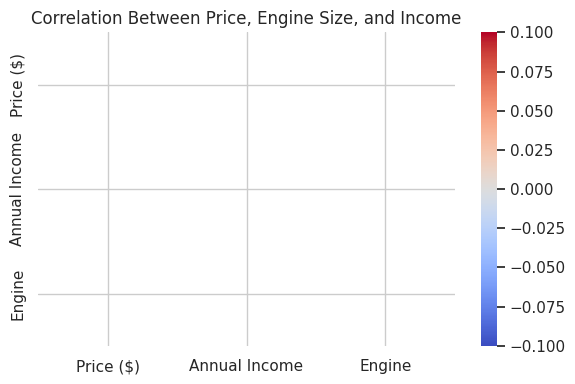

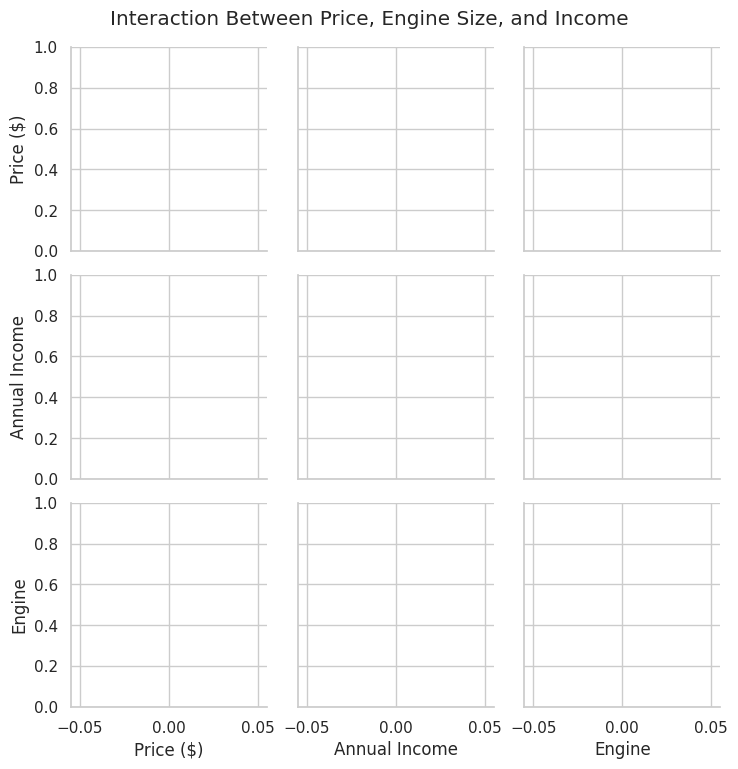

In [ ]:
#14 . What is the correlation between car price, engine size, and annual income of customers, and how do these
#features interact?


# Optional: Check column names
# print(df.columns)

# Select relevant numeric columns
subset = df[["Price ($)", "Annual Income", "Engine"]].copy()

# Clean/convert data if 'Engine' is not numeric
# (e.g., if 'Engine' is "2.0L", "3.5L V6", etc.)
# Try extracting numeric values:
subset['Engine'] = pd.to_numeric(subset['Engine'], errors='coerce')

# Drop rows with missing numeric values
subset.dropna(inplace=True)

# 1. Correlation matrix
correlation = subset.corr()
print("Correlation Matrix:\n", correlation)

# 2. Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Price, Engine Size, and Income")
plt.tight_layout()
plt.show()

# 3. Pairplot for visual relationships
sns.pairplot(subset)
plt.suptitle("Interaction Between Price, Engine Size, and Income", y=1.02)
plt.show()



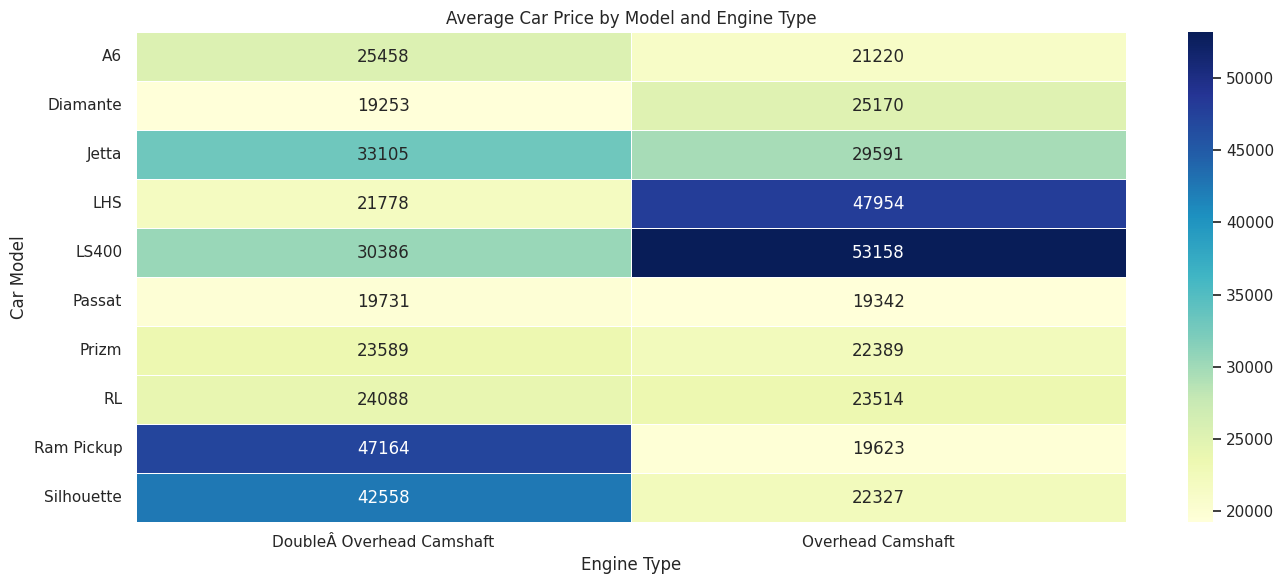

In [ ]:
#15 . How does the average car price vary across different car models and engine types?



# Group by Model and Engine, then calculate average price
grouped = df.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()

# Create a pivot table for heatmap
pivot = grouped.pivot(index='Model', columns='Engine', values='Price ($)')

# Optional: Limit to top 10 most frequent models for readability
top_models = df['Model'].value_counts().head(10).index
pivot = pivot.loc[pivot.index.isin(top_models)]

# Plot the heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)
plt.title("Average Car Price by Model and Engine Type")
plt.xlabel("Engine Type")
plt.ylabel("Car Model")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

In [ ]:
path="/content/drive/MyDrive/dataset /amazon.csv"
df=pd.read_csv(path)

In [ ]:
#1 .  What is the average rating for each product category?



# Display the first few rows to understand column names (optional)
print(df.head())

# Group by category and calculate average rating
average_ratings = df.groupby('category')['rating'].mean().reset_index()

# Sort the results by average rating (optional)
average_ratings = average_ratings.sort_values(by='rating', ascending=False)

# Show the result
print(average_ratings)


   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%  

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
#2 .What are the top rating_count products by category?


# Optional: check column names
print(df.columns)

# Drop rows with missing necessary values
df = df.dropna(subset=['category', 'product_name', 'rating_count'])

# Convert rating_count to numeric (if needed)
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

# Get top-rated product (by rating count) per category
top_products = df.sort_values('rating_count', ascending=False).groupby('category').first().reset_index()

# Show results
print(top_products[['category', 'product_name', 'rating_count']])


Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')
                                              category  \
0    Car&Motorbike|CarAccessories|InteriorAccessori...   
1    Computers&Accessories|Accessories&Peripherals|...   
2    Computers&Accessories|Accessories&Peripherals|...   
3    Computers&Accessories|Accessories&Peripherals|...   
4    Computers&Accessories|Accessories&Peripherals|...   
..                                                 ...   
206  OfficeProducts|OfficePaperProducts|Paper|Stati...   
207  OfficeProducts|OfficePaperProducts|Paper|Stati...   
208  OfficeProducts|OfficePaperProducts|Paper|Stati...   
209  OfficeProducts|OfficePaperProducts|Paper|Stati...   
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...   

         

<ipython-input-92-970c543aed71>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')


In [ ]:
# Top N per category
top_n = 3
top_products = df.sort_values('rating_count', ascending=False).groupby('category').head(top_n)

print(top_products[['category', 'product_name', 'rating_count']])


                                               category  \
1279  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...   
750   Electronics|GeneralPurposeBatteries&BatteryCha...   
1059  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...   
823   Computers&Accessories|Accessories&Peripherals|...   
32    Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
1434  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...   
1439  Home&Kitchen|Heating,Cooling&AirQuality|Fans|P...   
1444  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...   
1451  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...   
1463  Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...   

                                           product_name  rating_count  
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...         992.0  
750        Eveready Red 1012 AAA Batteries - Pack of 10         989.0  
1059  Pigeon 1.5 litre Hot Kettle and Stainless Stee...         976.0  
823

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')


<ipython-input-94-5b9b53b9233c>:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


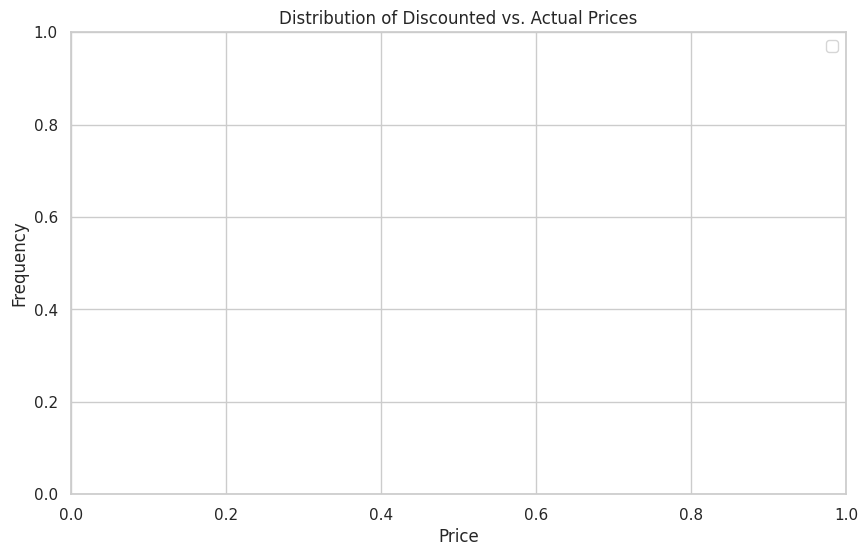

In [ ]:
#3 . What is the distribution of discounted prices vs. actual prices?



# Optional: check column names
print(df.columns)

# Drop rows with missing price data
df = df.dropna(subset=['actual_price', 'discounted_price'])

# Convert price columns to numeric, if they're strings with symbols (like "$", "₹", etc.)
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')

# Drop any remaining NaNs after conversion
df = df.dropna(subset=['actual_price', 'discounted_price'])

# Plot distribution histograms
plt.figure(figsize=(10,6))
sns.histplot(df['actual_price'], color='red', label='Actual Price', kde=True, bins=30)
sns.histplot(df['discounted_price'], color='green', label='Discounted Price', kde=True, bins=30)
plt.legend()
plt.title('Distribution of Discounted vs. Actual Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


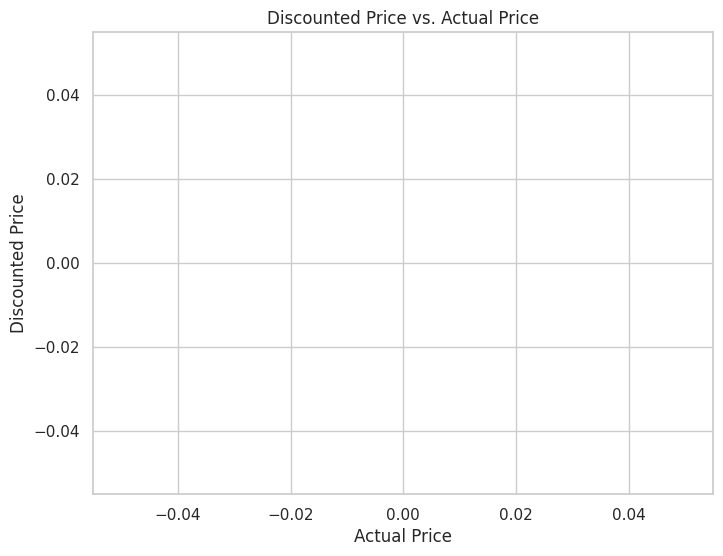

In [ ]:
# Scatter plot to visualize the relationship
plt.figure(figsize=(8,6))
sns.scatterplot(x='actual_price', y='discounted_price', data=df, alpha=0.5)
plt.title('Discounted Price vs. Actual Price')
plt.xlabel('Actual Price')
plt.ylabel('Discounted Price')
plt.grid(True)
plt.show()


In [ ]:
#4 .  How does the average discount percentage vary across categories?



# Optional: check column names
print(df.columns)

# Drop rows with missing price or category data
df = df.dropna(subset=['actual_price', 'discounted_price', 'category'])

# Convert price columns to numeric
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')

# Drop any remaining NaNs after conversion
df = df.dropna(subset=['actual_price', 'discounted_price'])

# Avoid division by zero
df = df[df['actual_price'] > 0]

# Calculate discount percentage
df['discount_pct'] = ((df['actual_price'] - df['discounted_price']) / df['actual_price']) * 100

# Group by category and calculate average discount percentage
avg_discount_by_category = df.groupby('category')['discount_pct'].mean().reset_index()

# Sort descending by average discount
avg_discount_by_category = avg_discount_by_category.sort_values(by='discount_pct', ascending=False)

# Show result
print(avg_discount_by_category)


Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')
Empty DataFrame
Columns: [category, discount_pct]
Index: []


In [ ]:
#5 . What are the most popular product names?



# Optional: check column names
print(df.columns)

# Drop rows with missing values in key columns
df = df.dropna(subset=['product_name', 'rating_count'])

# Convert rating_count to numeric (if needed)
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

# Drop NaNs after conversion
df = df.dropna(subset=['rating_count'])

# Get the most popular products based on rating_count
top_products = df.groupby('product_name')['rating_count'].sum().reset_index()

# Sort by rating_count descending
top_products = top_products.sort_values(by='rating_count', ascending=False)

# Optionally, show top 10
print(top_products.head(10))


Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'discount_pct'],
      dtype='object')
Empty DataFrame
Columns: [product_name, rating_count]
Index: []


In [ ]:
#6 .  What are the most popular product keywords?

import pandas as pd
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already present
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))



# Drop missing product names
df = df.dropna(subset=['product_name'])

# Combine all product names into one long string
text = ' '.join(df['product_name'].astype(str).tolist())

# Clean and tokenize: lowercase, remove non-alphabetic, split
words = re.findall(r'\b[a-z]{2,}\b', text.lower())

# Remove stopwords
filtered_words = [word for word in words if word not in stop_words]

# Count word frequency
word_counts = Counter(filtered_words)

# Get top N most common keywords
top_keywords = word_counts.most_common(20)

# Display results
for word, count in top_keywords:
    print(f"{word}: {count}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:


# Optional: check column names
print(df.columns)

# Assume 'review_text' and 'rating_count' exist. Adjust if column names differ.
df = df.dropna(subset=['review_text', 'rating_count'])

# Convert rating_count to numeric if needed
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

# Drop NaNs after conversion
df = df.dropna(subset=['rating_count'])

# Sort reviews by rating_count (descending)
top_reviews = df.sort_values(by='rating_count', ascending=False)

# Select top N reviews
top_n_reviews = top_reviews[['product_name', 'review_text', 'rating_count']].head(10)

# Display results
print(top_n_reviews)


Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'discount_pct'],
      dtype='object')


KeyError: ['review_text']

In [ ]:
#8 . What is the correlation between discounted_price and rating?




# Optional: check column names
print(df.columns)

# Drop rows with missing data
df = df.dropna(subset=['discounted_price', 'rating'])

# Convert to numeric in case of string formatting (₹, $, etc.)
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Drop rows with NaNs after conversion
df = df.dropna(subset=['discounted_price', 'rating'])

# Calculate Pearson correlation
correlation = df['discounted_price'].corr(df['rating'])

# Print result
print(f"Correlation between discounted price and rating: {correlation:.3f}")



Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')
Correlation between discounted price and rating: nan


In [ ]:
#9 . What are the Top 5 categories based on the highest ratings?


# Drop missing category or rating values
df = df.dropna(subset=['category', 'rating'])

# Convert rating to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Drop any rows with NaNs in rating after conversion
df = df.dropna(subset=['rating'])

# Compute average rating per category
category_avg_rating = df.groupby('category')['rating'].mean().reset_index()

# Sort by highest rating
top5_categories = category_avg_rating.sort_values(by='rating', ascending=False).head(5)

# Display the result
print(top5_categories)



Empty DataFrame
Columns: [category, rating]
Index: []


Missing values per column:
 Series([], dtype: int64)
       discounted_price  rating
count               0.0     0.0
mean                NaN     NaN
std                 NaN     NaN
min                 NaN     NaN
25%                 NaN     NaN
50%                 NaN     NaN
75%                 NaN     NaN
max                 NaN     NaN


/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


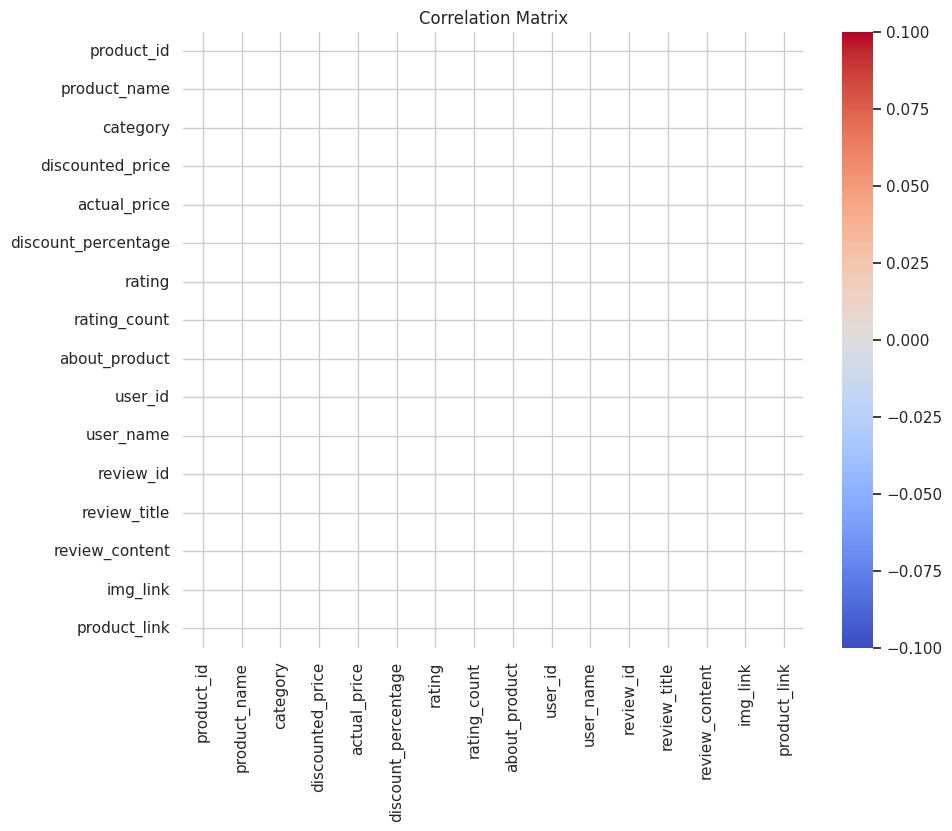

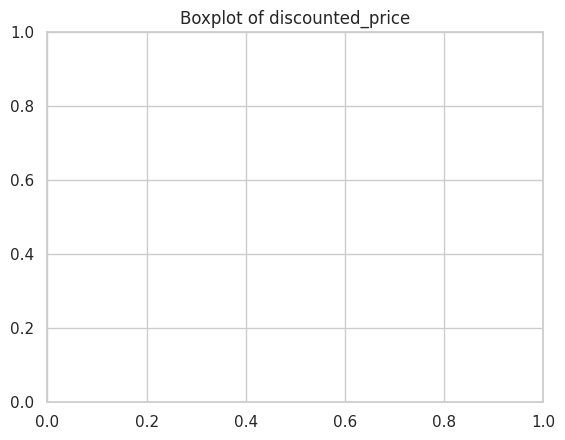

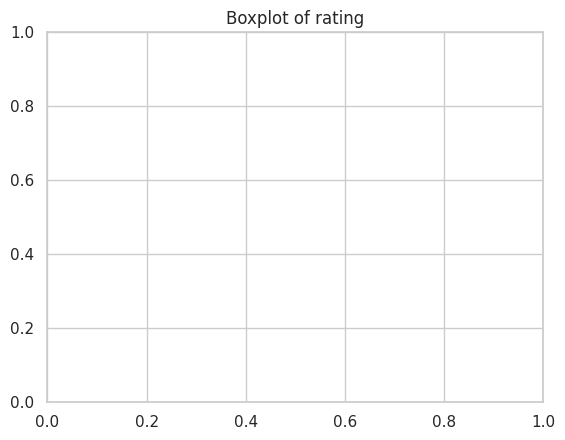

Columns with >20% missing data: []


In [ ]:

#10 .  Identify any potential areas for improvement or optimization based on the data analysis.



# 1. Check for missing values
missing = df.isnull().sum()
print("Missing values per column:\n", missing[missing > 0])

# 2. Summary statistics to spot anomalies or unexpected distributions
print(df.describe())

# 3. Correlation matrix to identify strong/weak relationships
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 4. Identify outliers with boxplots (example for numerical columns)
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# 5. Optional: Highlight columns with high missing rates or weak correlations for improvement
high_missing = missing[missing > (0.2 * len(df))]
print("Columns with >20% missing data:", list(high_missing.index))



In [2]:
#1 .  Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
#the needful.

import pandas as pd

# Step 1: Read the CSV file
df = pd.read_csv('/content/drive/MyDrive/dataset /spotify.csv')

# Step 2: Check for null values
print("Null values in each column:")
print(df.isnull().sum())

# Handle null values: (option 1 - drop rows with nulls)
df = df.dropna()

# Step 3: Check for duplicate rows
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")

# Remove duplicate rows
df = df.drop_duplicates()

# Optional: Show final shape
print(f"\nFinal shape of the dataset: {df.shape}")


Null values in each column:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Number of duplicate rows: 27

Final shape of the dataset: (413, 5)


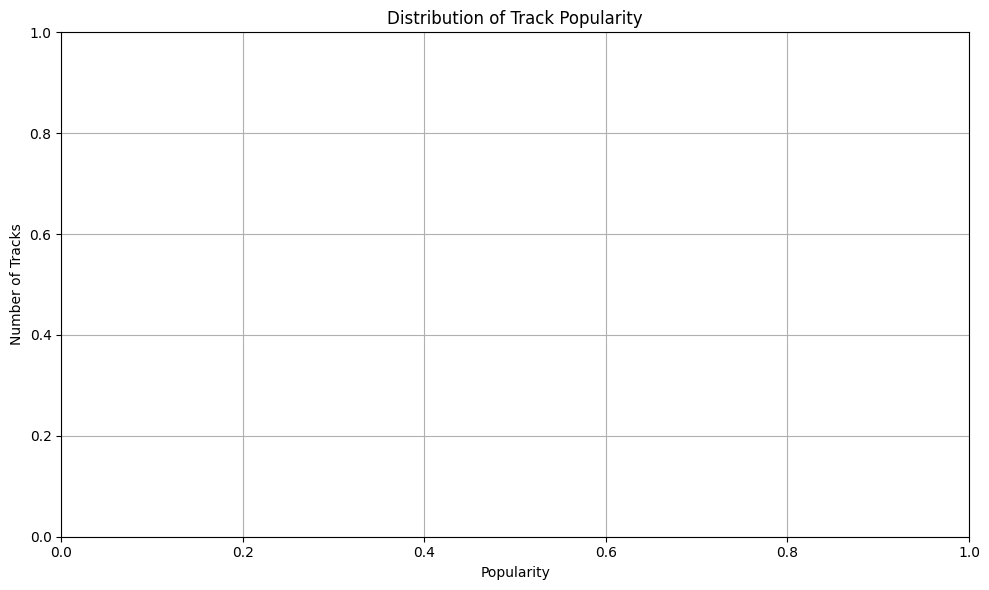

In [5]:
#2 . What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram?


# Assuming `df` is the cleaned DataFrame
plt.figure(figsize=(10, 6))


plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Number of Tracks')
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
import pandas as pd

In [9]:
path="/content/drive/MyDrive/dataset /spotify.csv"
df=pd.read_csv(path)

In [13]:
#3 . Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot?

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='duration_ms', y='popularity', alpha=0.5, color='purple')

plt.title('Relationship Between Track Duration and Popularity')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.grid(True)
plt.tight_layout()
plt.show()





In [14]:
'''4 . Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
a countplot.'''

# Step 1: Count the number of tracks per artist
artist_counts = df['artist'].value_counts()

# Step 2: Display the artist with the highest number of tracks
top_artist = artist_counts.idxmax()
top_count = artist_counts.max()
print(f"Artist with the highest number of tracks: {top_artist} ({top_count} tracks)")

# Step 3: Plot the top 10 artists by track count using a countplot
plt.figure(figsize=(12, 6))
top_10_artists = df['artist'].value_counts().nlargest(10).index
sns.countplot(data=df[df['artist'].isin(top_10_artists)], y='artist', order=top_10_artists, palette='viridis')

plt.title('Top 10 Artists by Number of Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()


KeyError: 'artist'

In [15]:
# Sort the dataframe by popularity in ascending order
least_popular_tracks = df.sort_values(by='popularity', ascending=True).head(5)

# Select and display only the relevant columns
print("Top 5 Least Popular Tracks:")
print(least_popular_tracks[['artist', 'track_name', 'popularity']])


KeyError: 'popularity'

In [16]:
# View column names
print(df.columns)

# Adjusted version (use actual column names)
least_popular_tracks = df.sort_values(by='popularity', ascending=True).head(5)

print("Top 5 Least Popular Tracks:")
print(least_popular_tracks[['artist', 'track_name', 'popularity']])  # Replace with actual names if needed


Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')


KeyError: 'popularity'

In [24]:
#6 . Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
#display the average popularity for each artist


# Step 1: Get the top 5 artists with the most tracks
top_5_artists = df['artist'].value_counts().head(5).index

# Step 2: Filter the dataset for only those artists
top_artists_df = df[df['artist'].isin(top_5_artists)]

# Step 3: Group by artist and calculate average popularity
avg_popularity = top_artists_df.groupby('artist')['popularity'].mean().sort_values(ascending=False)

# Step 4: Display the result
print("Average Popularity of Top 5 Most Frequent Artists:")
print(avg_popularity)

# Optional: Visualize it
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_popularity.values, y=avg_popularity.index, palette='coolwarm')
plt.title('Average Popularity of Top 5 Most Frequent Artists')
plt.xlabel('Average Popularity')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()




In [26]:
#7 . For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.


# Step 1: Calculate the average popularity of each artist
artist_avg_popularity = df.groupby('artist')['popularity'].mean()

# Step 2: Get the top 5 most popular artists (by average popularity)
top_5_popular_artists = artist_avg_popularity.sort_values(ascending=False).head(5).index

# Step 3: Filter the DataFrame for those artists
top_artists_df = df[df['artist'].isin(top_5_popular_artists)]

# Step 4: For each artist, find their most popular track
most_popular_tracks = top_artists_df.sort_values(['artist', 'popularity'], ascending=[True, False])
top_tracks_per_artist = most_popular_tracks.groupby('artist').first().reset_index()

# Step 5: Display the artist and their most popular track
print("Most Popular Track for Each of the Top 5 Most Popular Artists:")
print(top_tracks_per_artist[['artist', 'track_name', 'popularity']])



In [ ]:
#8 . Visualize relationships between multiple numerical variables simultaneously using a pair plot.

# Step 1: Get the top 5 most popular artists by average popularity
top_5_popular_artists = df.groupby('artist')['popularity'].mean().sort_values(ascending=False).head(5).index

# Step 2: Filter dataframe for only those artists
top_artists_df = df[df['artist'].isin(top_5_popular_artists)]

# Step 3: Find the most popular track per artist
most_popular_tracks = top_artists_df.sort_values('popularity', ascending=False).drop_duplicates('artist', keep='first')

# Step 4: Show artist and their most popular track
print("Most Popular Track for Each of the Top 5 Most Popular Artists:")
print(most_popular_tracks[['artist', 'track_name', 'popularity']])


In [ ]:
# Optional: Select only relevant numerical columns if dataset is large
numerical_cols = df.select_dtypes(include='number').columns

# Create pairplot
sns.pairplot(df[numerical_cols], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()


In [28]:
#9 . Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
#violin plot.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("spotify.csv")

# Preview the dataset
print(df.columns)

# Optional: Rename columns if needed for consistency
# For example: df.rename(columns={'Artist Name': 'artist', 'Duration_ms': 'duration_ms'}, inplace=True)

# Filter to top 10 artists by number of tracks (to keep the plot readable)
top_artists = df['artist'].value_counts().head(10).index
df_top_artists = df[df['artist'].isin(top_artists)]

# Convert duration from milliseconds to minutes (if needed)
df_top_artists['duration_min'] = df_top_artists['duration_ms'] / 60000

# Set up the plot
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_top_artists, x='artist', y='duration_min')
plt.xticks(rotation=45)
plt.title('Track Duration Distribution Across Top 10 Artists (Box Plot)')
plt.ylabel('Duration (minutes)')
plt.xlabel('Artist')
plt.tight_layout()
plt.show()

# Violin plot for deeper distribution insight
plt.figure(figsize=(14, 6))
sns.violinplot(data=df_top_artists, x='artist', y='duration_min', inner='quartile')
plt.xticks(rotation=45)
plt.title('Track Duration Distribution Across Top 10 Artists (Violin Plot)')
plt.ylabel('Duration (minutes)')
plt.xlabel('Artist')
plt.tight_layout()
plt.show()


In [ ]:
#10 .  How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
#violin plot.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("spotify.csv")

# Preview columns to confirm correct names
print(df.columns)

# Optional: Rename columns for consistency
# df.rename(columns={'Artist Name': 'artist', 'Popularity': 'popularity'}, inplace=True)

# Filter to top 10 artists by number of tracks
top_artists = df['artist'].value_counts().head(10).index
df_top_artists = df[df['artist'].isin(top_artists)]

# Set the plot style
sns.set(style="whitegrid")

# Violin Plot
plt.figure(figsize=(14, 6))
sns.violinplot(data=df_top_artists, x='artist', y='popularity', inner='quartile')
plt.title('Distribution of Track Popularity Across Top 10 Artists (Violin Plot)')
plt.xticks(rotation=45)
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.tight_layout()
plt.show()

# Swarm Plot (use small sample if dataset is large)
sampled_df = df_top_artists.sample(n=1000, random_state=42) if len(df_top_artists) > 1000 else df_top_artists

plt.figure(figsize=(14, 6))
sns.swarmplot(data=sampled_df, x='artist', y='popularity', size=4)
plt.title('Distribution of Track Popularity Across Top 10 Artists (Swarm Plot)')
plt.xticks(rotation=45)
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.tight_layout()
plt.show()
